In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
df_oneway = pd.read_csv("ssha_one-way_sE_20s.csv")
df_fullycp = pd.read_csv("ssha_fully-coupled_sE_20s.csv") #o6
df_fullycp

,locationFlag,partition,u1,u2,u3,v1,v2,v3,vtkValidPointMask,arc_length,Points:0,Points:1,Points:2
0,3,8,0.000024,-1.753500e-05,-0.006805,0.000044,-0.000041,0.006212,1,0.000,597000.0,7365000.0,0
1,3,8,0.000024,-1.753500e-05,-0.006805,0.000044,-0.000041,0.006212,1,76.646,597070.0,7365000.0,0
2,3,8,0.000027,-1.360700e-05,-0.006421,0.000040,-0.000034,0.004409,1,153.540,597130.0,7364900.0,0
3,3,8,0.000031,-2.491200e-07,-0.005925,0.000036,-0.000017,0.000641,1,230.190,597200.0,7364900.0,0
4,3,8,0.000033,7.747100e-07,-0.005670,0.000034,-0.000016,-0.002418,1,306.830,597270.0,7364800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,3,19,-0.031397,-2.614700e-02,0.085315,-0.002197,-0.002714,-0.014923,1,76424.000,663300.0,7327000.0,0
997,3,19,-0.020477,-2.794800e-02,0.083944,-0.000934,-0.003020,-0.016953,1,76501.000,663360.0,7326900.0,0
998,3,19,-0.018021,-3.060500e-02,0.083279,-0.000890,-0.002990,-0.017455,1,76578.000,663430.0,7326900.0,0
999,3,19,0.029262,-3.514500e-02,0.084553,0.002181,-0.003485,-0.015720,1,76655.000,663500.0,7326900.0,0


In [67]:
def conversion_xy2length(x_start,y_start,x_end,y_end):
    from pyproj import Transformer
    transformer = Transformer.from_crs("utm27", "epsg:4326", always_xy=True)
    lon_start, lat_start = transformer.transform(x_start, y_start)
    lon_end, lat_end = transformer.transform(x_end, y_end)
    
    import geopy.distance 
    coords_1 = (lon_start, lat_start)
    coords_2 = (lon_end, lat_end)
    length = geopy.distance.geodesic(coords_1, coords_2).km
    return length 

In [68]:
x_start = df_oneway["Points:0"][0]
y_start = df_oneway["Points:1"][0]
x_end = df_oneway["Points:0"][len(df)-1]
y_end = df_oneway["Points:1"][len(df)-1]

length = conversion_xy2length(x_start,y_start,x_end,y_end)
length 

163.8223791625346

In [69]:
x_start = df_fullycp["Points:0"][0]
y_start = df_fullycp["Points:1"][0]
x_end = df_fullycp["Points:0"][len(df)-1]
y_end = df_fullycp["Points:1"][len(df)-1]

length = conversion_xy2length(x_start,y_start,x_end,y_end)
length 

163.8223791625346

In [70]:
#plt.plot(df.arc_length, df.ssha)

In [71]:
distance = np.linspace(0,length,len(df))
len(distance)

1001

(-0.1, 0.1)

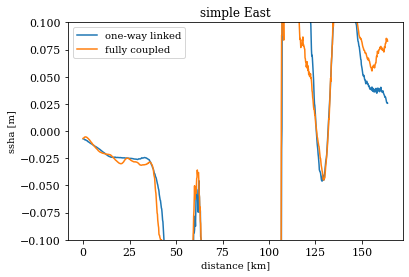

In [94]:
plt.plot(distance, df_oneway.ssha, label="one-way linked")
plt.plot(distance, df_fullycp.u3, label="fully coupled")
plt.title("simple East")
plt.xlabel('distance [km]')
plt.ylabel('ssha [m]')
plt.legend()
plt.ylim(-0.1,0.1)

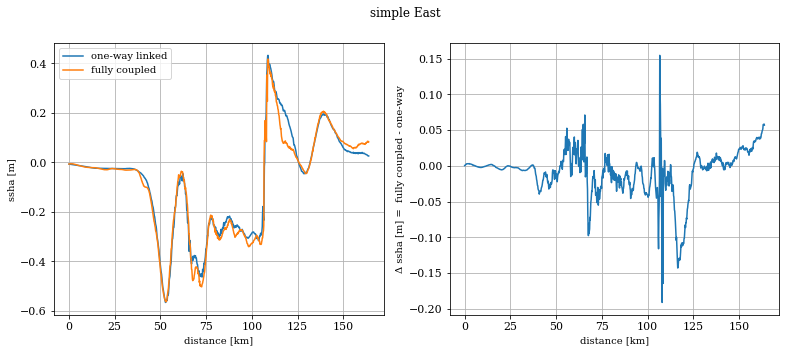

In [93]:
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
fig.suptitle("simple East")

ax1.plot(distance, df_oneway.ssha, label="one-way linked")
ax1.plot(distance, df_fullycp.u3, label="fully coupled")
ax1.set_xlabel('distance [km]')
ax1.set_ylabel('ssha [m]')
ax1.legend()
ax1.grid()

ax2.plot(distance, df_fullycp.u3-df_oneway.ssha)
ax2.set_ylabel('\u0394 ssha [m] =  fully coupled - one-way')
ax2.set_xlabel('distance [km]')
ax2.grid()